In [1]:
import healpy as hp
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

### Starting with a Commander map

In [2]:
map_test = hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits')

/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/home/rahima/anaconda3/

In [3]:
map_cls = hp.anafast(map_test, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


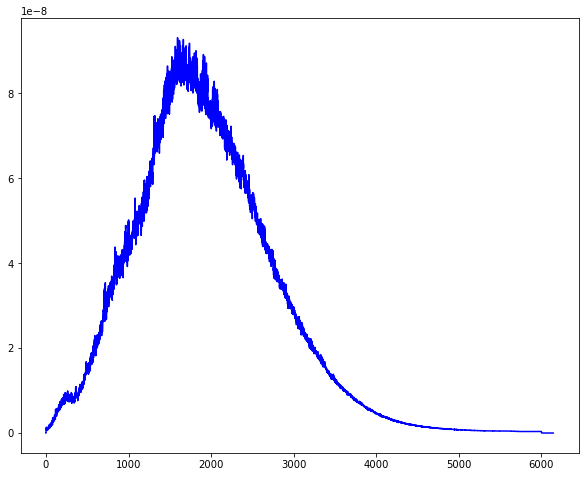

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))

l = np.arange(0 , map_cls.size)

plt.plot(l, l*(l+1)*map_cls/(2*np.pi), 'b')

# plt.xlim([100, 900])
plt.show()

In [1]:
%pwd

'/home/rahima/NG+lens'

/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/home/rahima/anaconda3/

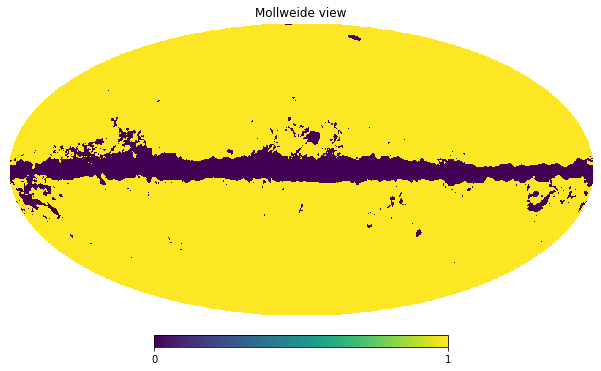

In [5]:
map_mask =hp.read_map('/share/storage1/simulations/horizon/cmb-map/COM_CMB_IQU-commander_2048_R3.00_full.fits', field=3)
hp.mollview(map_mask)

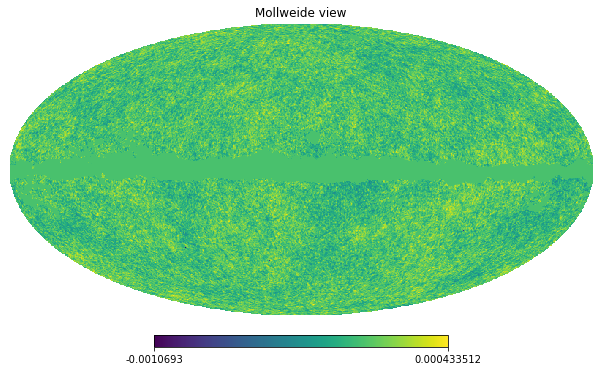

In [6]:
masked_map = map_mask * map_test
hp.mollview(masked_map)

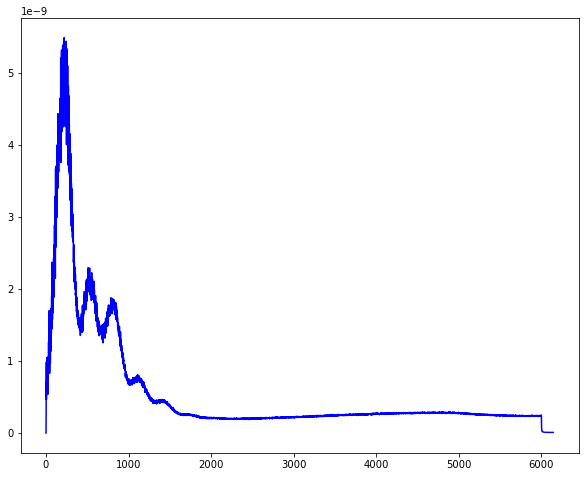

In [7]:
masked_map_cls = hp.anafast(masked_map, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
plt.figure(figsize = (10,8))

l = np.arange(0 , masked_map_cls.size)

plt.plot(l, l*(l+1)*masked_map_cls/(2*np.pi), 'b')

# plt.xlim([100, 900])
plt.show()

In [8]:
##### 2018 #####

common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                      'output':'tCl,pCl,lCl',
                      'lensing':'yes',
                      'A_lens': 1.,
#                       LambdaCDM parameters
                      'h':0.6732,
#                       'A_lens': 0.14 ,
                      'omega_b':0.022383,
                      'omega_cdm':0.12011,
                      'Omega_k':0,
                      'ln10^{10}A_s': 3.0448,
                      #'N_ur' : 3,
                      'n_s':0.96605,
                      'z_reio' : 7.68,
                      #'stat_f_idr' :0.875 ,
                      'YHe':0.246727,
#                       'm_ncdm' : [0.06],
                      # other output and precision parameters
                      'l_max_scalars':5000}

M = Class()
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(2501)
cl_len = M.lensed_cl(2501)
ell = cl_tot['ell'][2:]

factor = ell*(ell+1.)/2./np.pi
T_cmb=  2.7255e6
cl_lensed = factor*cl_len['tt'][2:]*T_cmb**2

C_L = np.loadtxt("/home/rahima/COM_PowerSpect_CMB-TT-full_R3.01.txt")
dls_planck = C_L[:,1]

import pylab
plt.figure(figsize = (10,8))
plt.plot(ell, ell*(ell+1)*masked_map_cls[2:2502]*10**12/(2*np.pi), 'k', label = 'commander + mask')
plt.plot(ell, dls_planck[:2500], 'g', label = 'planck data')
plt.plot(ell, cl_lensed, 'b', label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

NameError: name 'masked_map_cls' is not defined

<Figure size 720x576 with 0 Axes>

In [9]:
cl_len['tt'][2:]

array([1.43677345e-10, 6.80330618e-11, 3.86488666e-11, ...,
       1.07093101e-17, 1.06691959e-17, 1.06293350e-17])

### Using Planck simulations

In [10]:
map_sim = hp.read_map('/share/storage1/simulations/horizon/cmb-map/dx12_v3_commander_cmb_mc_00000_raw.fits')
sim_cls = hp.anafast(map_sim, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/rahima/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


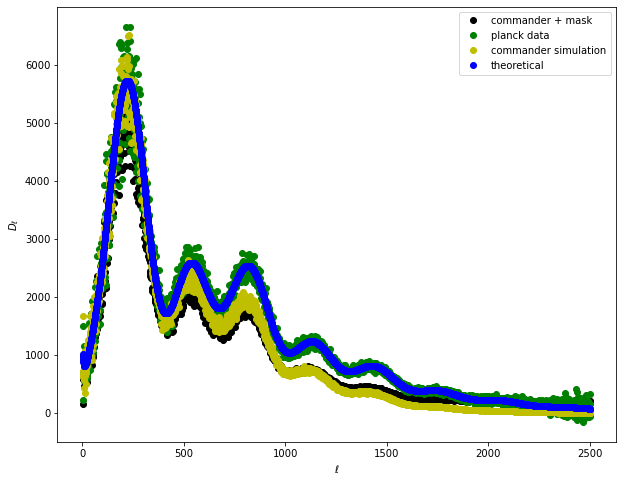

In [11]:

import pylab
plt.figure(figsize = (10,8))
plt.plot(ell, ell*(ell+1)*masked_map_cls[2:2502]*10**12/(2*np.pi), 'ok', label = 'commander + mask')
plt.plot(ell, dls_planck[:2500], 'og', label = 'planck data')
plt.plot(ell, ell*(ell+1)*sim_cls[2:2502]*10**12/(2*np.pi), 'oy', label = 'commander simulation')
plt.plot(ell, cl_lensed, 'ob', label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

### creating simulation

In [9]:
N = 1
lmax = 2500+1
alm_size = ((lmax*(2*lmax +1 - lmax)/2) + (lmax+1))-3
chi_lm = []
np.random.seed(0)
for i in range(N):
    chi = np.random.normal(loc = 0 ,scale =(1/np.sqrt(2)) ,size =int(alm_size)) + 1j*(np.random.normal(loc= 0 , scale=(1/np.sqrt(2)), size=int(alm_size)))
    chi_lm.append(chi)
chi_lm = np.asarray(chi_lm)    
y_lm = []    
np.random.seed(2)
for i in range(N):
    ylm = np.random.normal(loc = 0 ,scale =(1/np.sqrt(2)) ,size =int(alm_size)) + 1j*(np.random.normal(loc= 0 , scale=(1/np.sqrt(2)), size=int(alm_size)))
    y_lm.append(ylm)
y_lm = np.asarray(y_lm)    

In [10]:
def diagonal_matrice(diag, lmax):
    matrice = []
    ell = np.arange(3,lmax+2)
    for i in range(len(ell)):
        for k in range(ell[i]):
            matrice.append(diag[i])
    return matrice    

#ordering starts from l=0
def order(alm , lmax):
    
    order = []
    for l in range(0 , lmax + 1 , 1):
        for m in range(l+1):
            index = hp.Alm.getidx(lmax, l, m)
            order.append(index)

    tmp = np.zeros(int(alm_size)+3) + np.zeros(int(alm_size)+3)*1j
    for i in range(int(alm_size)+3):
        tmp[order[i]] = alm[i]

    order_aL = np.asarray(tmp)
    order_aL = np.reshape(order_aL, (int(alm_size)+3,))
    im = order_aL[:lmax].imag*0
    re = order_aL[:lmax].real
    tot_L = re + im*1j

    f = []
    ones = lmax
    while (ones != 0):
        for i in range(ones):
            f.append(1)
        f.append(0 + 0*1j)
        ones = ones-1
    f = np.array(f)
    final_mult = np.hstack((f, (0+0*1j)))

    order_alm_fin = np.hstack(( tot_L,  order_aL[(lmax):(int(alm_size)+3)]))
    final_alm = final_mult * order_alm_fin
    return final_alm

In [11]:
c_tt_sqrt = np.sqrt(cl_len['tt'][2:]*T_cmb**2)
matrice_TT = diagonal_matrice(c_tt_sqrt,lmax) 
a_p = matrice_TT * y_lm[0]
a_p = np.hstack((np.zeros(3,dtype=complex),a_p))
final_alm = order(a_p, lmax)

In [12]:
cl_LISW = hp.alm2cl(final_alm ,  lmax=None, mmax=None, lmax_out=None, nspec=None)
cl_LISW.shape

(2502,)

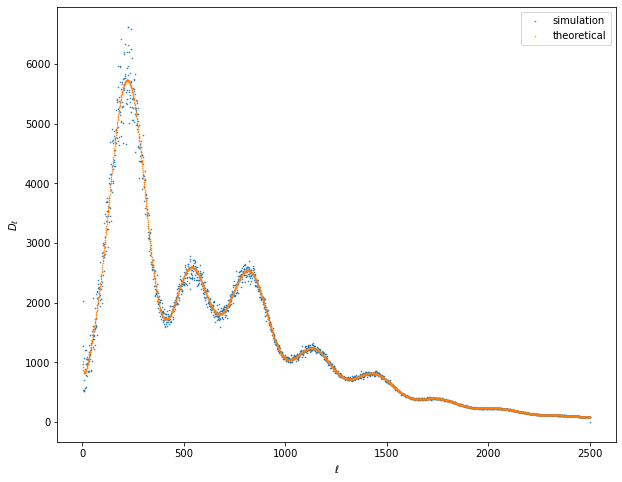

In [13]:

import pylab
plt.figure(figsize = (10,8))
plt.scatter(ell, ell*(ell+1)*cl_LISW[2:]/(2*np.pi), s =0.3, label = 'simulation')
# plt.plot(ell, dls_planck[:2500], 'g', label = 'planck data')
plt.scatter(ell, cl_lensed,s =0.3, label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.savefig('output_plot1.pdf')
plt.show()


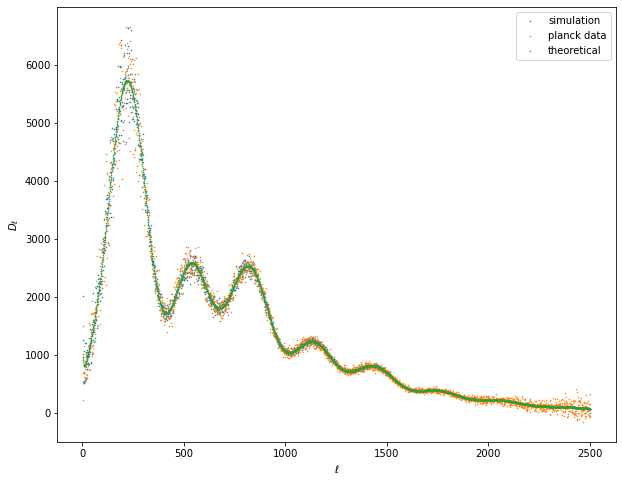

In [14]:

import pylab
plt.figure(figsize = (10,8))
plt.scatter(ell, ell*(ell+1)*cl_LISW[2:]/(2*np.pi),s=0.3, label = 'simulation')
plt.scatter(ell, dls_planck[:2500],s =0.3, label = 'planck data')
plt.scatter(ell, cl_lensed,s =0.3, label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.savefig('output_plot2.pdf')

plt.show()

In [17]:
data = np.asarray([ell, cl_LISW[2:]])

In [19]:
data[0]

array([2.000e+00, 3.000e+00, 4.000e+00, ..., 2.499e+03, 2.500e+03,
       2.501e+03])

In [20]:
np.save("ell_cl.npy", data)

In [2]:
ell = np.load("ell_cl.npy")[0]
cl = np.load("ell_cl.npy")[1]

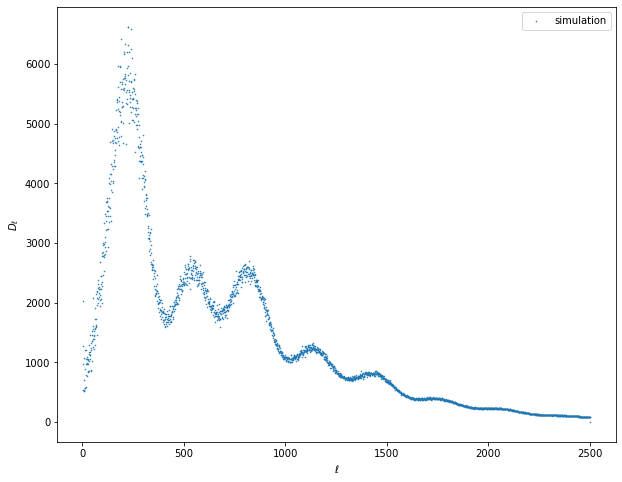

In [3]:
ell = np.load("ell_cl.npy")[0]
cl = np.load("ell_cl.npy")[1]
import pylab
plt.figure(figsize = (10,8))
plt.scatter(ell, ell*(ell+1)*cl/(2*np.pi),s=0.3, label = 'simulation')
plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()